# Seaborn

Import required libraries.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns

## Read data to visualize

Read the CSV file as a pandas dataframe.

In [4]:
data = pd.read_csv('Data/data.txt', delimiter=',')
data.info()

## Continuous data

Create a simple matplotlib scatter plot for $x$ and $y$.

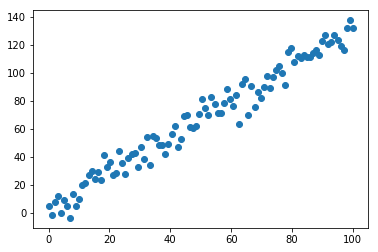

In [6]:
plt.scatter(x='x', y='y', data=data);

Now use Seaborn to plot the same data, but also include the result of a linear regression.

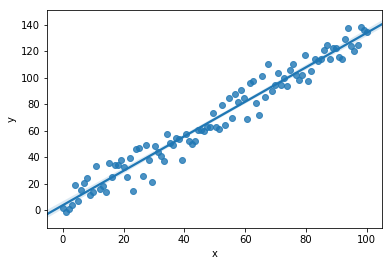

In [61]:
sns.regplot(x='x', y='y', data=data);

If we have data where the $x$-values are integer, and we have multiple $y$-values for each $x$-value, adding some "jitter" to the $x$-values makes the plot more informative.

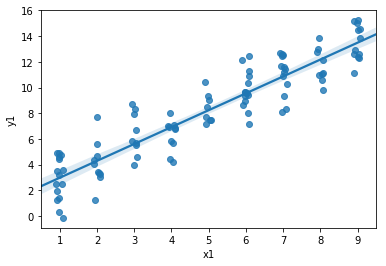

In [62]:
sns.regplot(x='x1', y='y1', data=data, x_jitter=0.1);

In the plot below, the mean value for $x$ is shown, as well as a confidence interval.

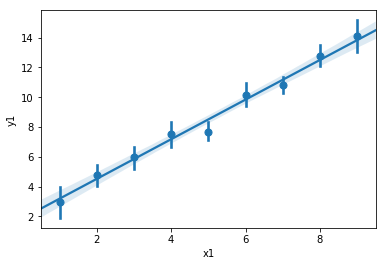

In [85]:
sns.regplot(x='x1', y='y1', data=data, x_estimator=np.mean);

A joint plot shows the distribution of the $x$ and $y$ data, as well as their relationship.

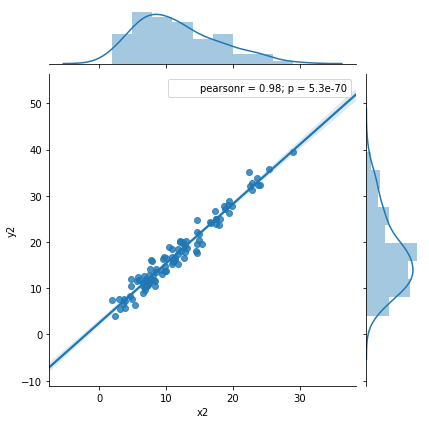

In [64]:
sns.jointplot(x='x2', y='y2', data=data, kind='reg');

Since we have a data set with a categorical attribute, the data set can be split per "label" category, showing a regression plot for each.

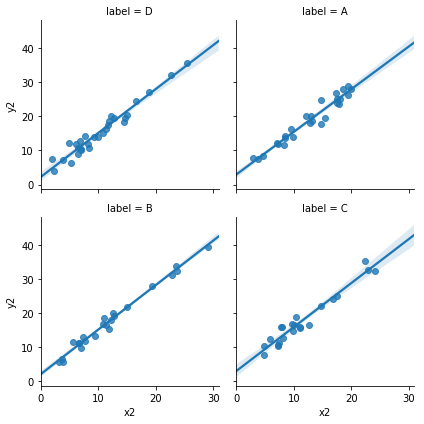

In [67]:
sns.lmplot(x='x2', y='y2', data=data,
           col='label', col_wrap=2, size=3);

For categorical data, it is also possible to plot the two "binary" categories in the same plot.

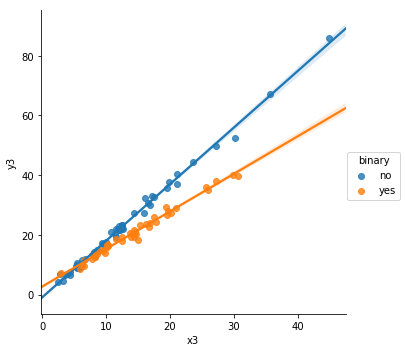

In [79]:
sns.lmplot(x='x3', y='y3', data=data, hue='binary');

In the plots below, we have a plot per category "label", but a hue per "binary" category as well.

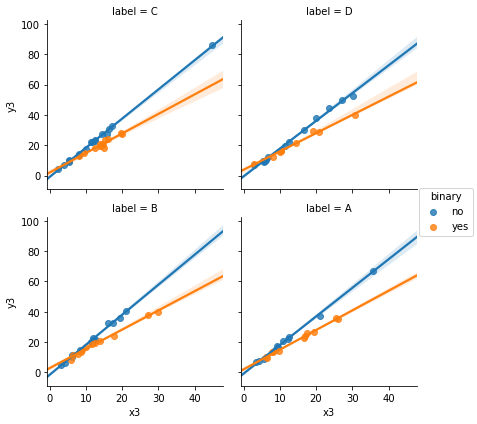

In [82]:
sns.lmplot(x='x3', y='y3', data=data, hue='binary',
           col='label', col_wrap=2, size=3);

The plot below shows the mean values and confidence intervals for the $x$-values split per "binary" category.

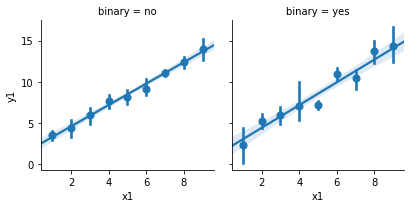

In [88]:
sns.lmplot(x='x1', y='y1', data=data, x_estimator=np.mean,
           col='binary', size=3);

## Categorical data

Plotting as a function of the "label" categories.  Again, we add some jitter to gain some insight into the $y$-value distribution.

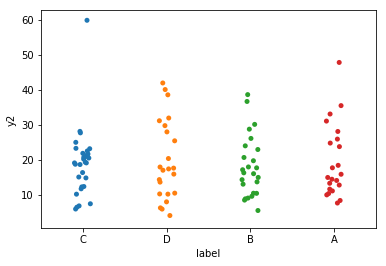

In [100]:
sns.stripplot(x='label', y='y2', data=data, jitter=True);

The data can be colored by its "binary" category.

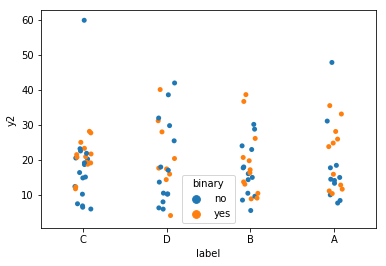

In [102]:
sns.stripplot(x='label', y='y2', data=data, hue='binary', jitter=True);

A box plot of this data shows the quantiles for this data.

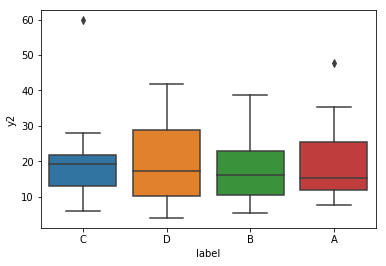

In [90]:
sns.boxplot(x='label', y='y2', data=data);

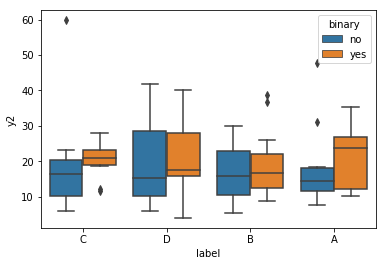

In [92]:
sns.boxplot(x='label', y='y2', data=data, hue='binary');

A violin plot gives more intuitive information on the distribution of the $y$-values.

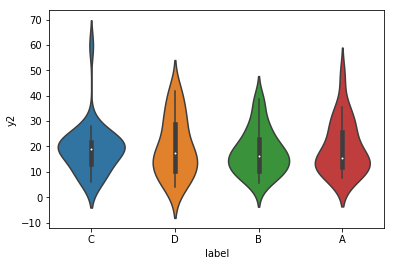

In [94]:
sns.violinplot(x='label', y='y2', data=data);

As before, the data can be colored by "binary" category.

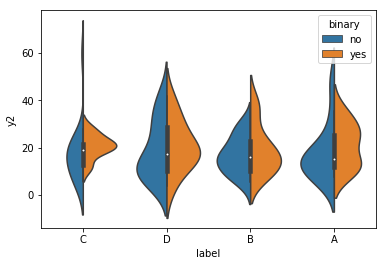

In [95]:
sns.violinplot(x='label', y='y2', data=data, hue='binary', split=True);

A count plot will simply give the counts of data points in each "label" category.

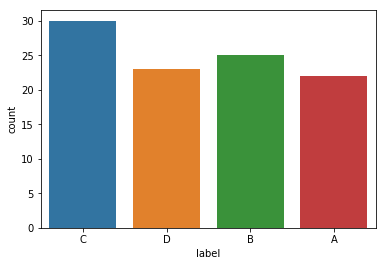

In [98]:
sns.countplot(x='label', data=data);

The count can be colored by the "binary" category as well.

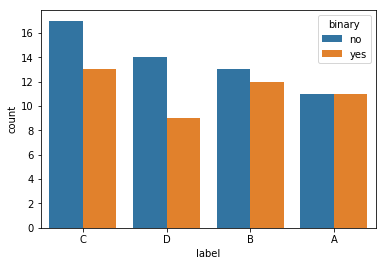

In [99]:
sns.countplot(x='label', data=data, hue='binary');

## Distributions

Plotting the distribution of data in a pandas dataframe is straightforward. The number of bins can be set conveniently, and the rug options indicates the value of individual points in the distribution. A kernel density estimation is automatically computed and plotted as well.

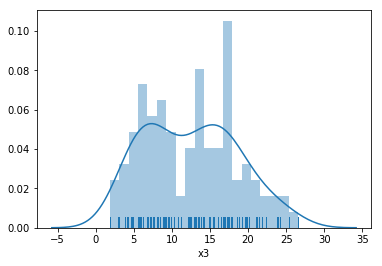

In [13]:
sns.distplot(data.x3, bins=20, rug=True);

The `kde` options controls whether the kernel density estimation is plotted or not, the `hist` option is used to show (default) or hide the histogram, e.g.,

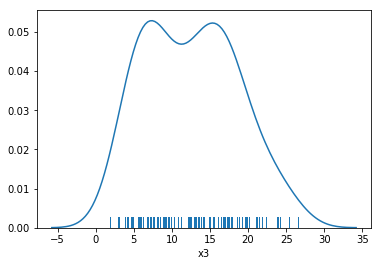

In [14]:
sns.distplot(data.x3, hist=False, rug=True);

Plotting bivariate distritions is easy as well.

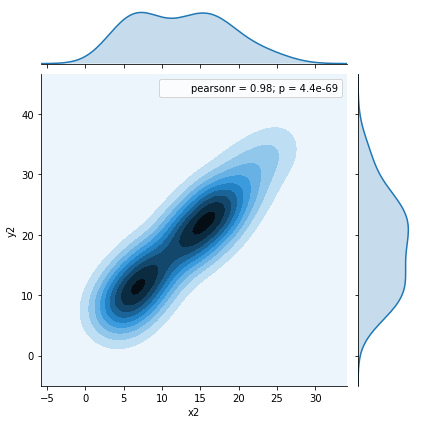

In [16]:
sns.jointplot(x='x2', y='y2', data=data, kind='kde');

A facet grid can be used to display distributions or other types of plots as a function of parameters, e.g., the "binary" category.

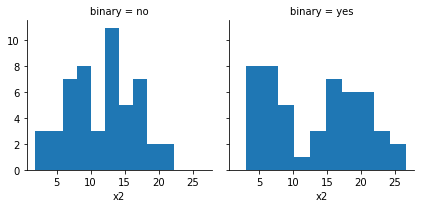

In [18]:
graph = sns.FacetGrid(data, col='binary')
graph.map(plt.hist, 'x2');

Both matplotlib and Seaborn plots can be mapped over the facet grid.

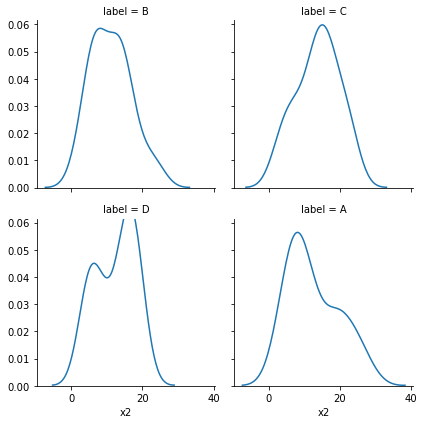

In [20]:
graph = sns.FacetGrid(data, col='label', col_wrap=2, size=3)
graph.map(sns.kdeplot, 'x2');

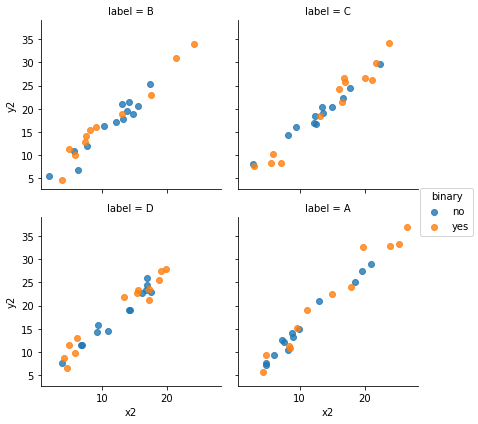

In [24]:
graph = sns.FacetGrid(data, col='label', hue='binary', col_wrap=2)
graph.map(plt.scatter, 'x2', 'y2', alpha=0.8)
graph.add_legend();